In [ ]:
!pip install xgboost
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 27.2 MB/s 


In [ ]:
%matplotlib inline
import matplotlib
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split

import shap

In [ ]:
dataset = pd.read_csv('crime_rehab_.csv')
dataset.sample(5)

,Age,Gender,Education level,Living area,Family type,Grown up by,Living with family,Residency,Economic status,Relationship between father & mother,...,Staying out all night,Having focus on study,Habit of telling lie,Aggressive nature,Habit of fighting,Usage rate of cellphone,Visits & watches prohibited sites,Smoking habit,Stealing money,Commit crime
226,16,male,never went to school,city,nuclear family,guardian,no,slum,working,bad,...,spending time by taking drugs,no,yes,yes,yes,extreme,yes,yes,no,yes
489,17,female,college,city,nuclear family,guardian,no,home,middle,good,...,by playing/watching tv/travelling with family ...,yes,no,no,no,average,no,no,no,no
306,16,male,high school,city,joint family,guardian,yes,home,upper,good,...,by playing/watching tv/travelling with family ...,yes,no,yes,no,average,no,no,yes,no
14,16,male,never went to school,city,nuclear family,none,no,home,lower,good,...,spending time by taking drugs,no,yes,yes,yes,average,yes,yes,yes,yes
436,16,male,high school,village,joint family,guardian,yes,home,lower,good,...,by playing/watching tv/travelling with family ...,no,yes,yes,yes,doesn't use,no,yes,no,no


In [ ]:
def print_unique_col_values(dataset):
       for column in dataset:
            if dataset[column].dtypes=='object':
                print(f'{column}: {dataset[column].unique()}')

In [ ]:
dataset.replace('spending time by taking drugs', 'yes', inplace=True)
dataset.replace('by playing/watching tv/travelling with family & friends', 'no', inplace=True)
dataset.replace('never went to school', 'dropout', inplace=True)

In [ ]:
print_unique_col_values(dataset)

Gender: ['male' 'female']
Education level: ['after S.S.C' 'dropout' 'high school' 'college']
Living area: ['city' 'village']
Family type: ['nuclear family' 'broken family' 'no family' 'joint family']
Grown up by: ['maid servant' 'guardian' 'none']
Living with family: ['yes' 'no']
Residency: ['home' 'slum' 'homeless (rail-station/ roadside)']
Economic status: ['upper' 'middle' 'lower' 'working']
Relationship between father & mother: ['bad' 'good' 'no relation']
Relationship with family: ['bad' 'good' 'no relation']
Following regular routine: ['no' 'somehow' 'yes']
Addicted person in family: ['yes' 'no']
Declining health: ['yes' 'no']
Alexithymia: ['no' 'yes']
Getting excessive money than needed: ['yes' 'no']
Victim of physical/mental torture: ['no' 'yes']
Depressed: ['yes' 'no']
Surrounding environment & companions: ['bad' 'good']
Have an drug peddler friend: ['yes' 'no']
Target to rich overnight: ['no' 'yes']
Staying out all night: ['yes' 'no']
Having focus on study: ['no' 'yes']
Habit

In [ ]:
!pip install pandas-profiling==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 259 kB 5.1 MB/s 
     |████████████████████████████████| 4.7 MB 48.5 MB/s 
     |████████████████████████████████| 690 kB 53.1 MB/s 
     |████████████████████████████████| 59 kB 6.5 MB/s 
     |████████████████████████████████| 812 kB 36.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8be6f09a016fb7fbab61e7b7c4b09f400636a7db3952f8905f8b4685689c0787
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=02f905eb2575b28ac8f1b4dc018652c63bd5cdca59c5fc765af6c49e9766cf9f
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin i

In [ ]:
profile = ProfileReport(dataset, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()
dataset.iloc[:,0]=labelencoder_x.fit_transform(dataset.iloc[:,0])
dataset.iloc[:,1]=labelencoder_x.fit_transform(dataset.iloc[:,1])
dataset.iloc[:,2]=labelencoder_x.fit_transform(dataset.iloc[:,2])
dataset.iloc[:,3]=labelencoder_x.fit_transform(dataset.iloc[:,3])
dataset.iloc[:,4]=labelencoder_x.fit_transform(dataset.iloc[:,4])
dataset.iloc[:,5]=labelencoder_x.fit_transform(dataset.iloc[:,5])
dataset.iloc[:,6]=labelencoder_x.fit_transform(dataset.iloc[:,6])
dataset.iloc[:,7]=labelencoder_x.fit_transform(dataset.iloc[:,7])
dataset.iloc[:,8]=labelencoder_x.fit_transform(dataset.iloc[:,8])
dataset.iloc[:,9]=labelencoder_x.fit_transform(dataset.iloc[:,9])
dataset.iloc[:,10]=labelencoder_x.fit_transform(dataset.iloc[:,10])

#%%
dataset.iloc[:,11]=labelencoder_x.fit_transform(dataset.iloc[:,11])
dataset.iloc[:,12]=labelencoder_x.fit_transform(dataset.iloc[:,12])
dataset.iloc[:,13]=labelencoder_x.fit_transform(dataset.iloc[:,13])
dataset.iloc[:,14]=labelencoder_x.fit_transform(dataset.iloc[:,14])
dataset.iloc[:,15]=labelencoder_x.fit_transform(dataset.iloc[:,15])
dataset.iloc[:,16]=labelencoder_x.fit_transform(dataset.iloc[:,16])
dataset.iloc[:,17]=labelencoder_x.fit_transform(dataset.iloc[:,17])
dataset.iloc[:,18]=labelencoder_x.fit_transform(dataset.iloc[:,18])
dataset.iloc[:,19]=labelencoder_x.fit_transform(dataset.iloc[:,19])
dataset.iloc[:,20]=labelencoder_x.fit_transform(dataset.iloc[:,20])
dataset.iloc[:,21]=labelencoder_x.fit_transform(dataset.iloc[:,21])
dataset.iloc[:,22]=labelencoder_x.fit_transform(dataset.iloc[:,22])
dataset.iloc[:,23]=labelencoder_x.fit_transform(dataset.iloc[:,23])
dataset.iloc[:,24]=labelencoder_x.fit_transform(dataset.iloc[:,24])
dataset.iloc[:,25]=labelencoder_x.fit_transform(dataset.iloc[:,25])
dataset.iloc[:,26]=labelencoder_x.fit_transform(dataset.iloc[:,26])
dataset.iloc[:,27]=labelencoder_x.fit_transform(dataset.iloc[:,27])
dataset.iloc[:,28]=labelencoder_x.fit_transform(dataset.iloc[:,28])
dataset.iloc[:,29]=labelencoder_x.fit_transform(dataset.iloc[:,29])
dataset.iloc[:,30]=labelencoder_x.fit_transform(dataset.iloc[:,30])

In [ ]:
from sklearn import preprocessing

X = dataset.drop('Commit crime',axis='columns')
y = dataset['Commit crime']

normalized_X=preprocessing.normalize(X)

normalized_X_train,normalized_X_test,y_train,y_test=train_test_split(normalized_X,y,test_size=.30,random_state=7)


Using all features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_R=RandomForestClassifier(n_estimators=100,random_state=42)
model_R.fit(normalized_X_train,y_train)
from sklearn.metrics import accuracy_score
   
predictions_test = model_R.predict(normalized_X_test)
accuracy_test = accuracy_score(y_test, predictions_test)

print('\nRandom ForestAverageTest Accuracy :',accuracy_test)


Random ForestAverageTest Accuracy : 0.9337748344370861


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(normalized_X_train,y_train)
predictions_test = model_knn.predict(normalized_X_test)
accuracy = accuracy_score(y_test, predictions_test)
print("K Neighbors Node Testing Accuracy: %.2f%%" % (accuracy * 100.0))

K Neighbors Node Testing Accuracy: 90.07%


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(normalized_X_train, y_train)
predictions_test = model.predict(normalized_X_test) 
accuracy = accuracy_score(y_test, predictions_test)
print("LR Testing Accuracy: %.2f%%" % (accuracy * 100.0))

LR Testing Accuracy: 92.72%


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(normalized_X_train, y_train)
y_pred = clf.predict(normalized_X_test)
from sklearn import metrics
print(" SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100.0)
print(classification_report(y_test,y_pred))

 SVM Accuracy: 93.37748344370861
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        83
           1       0.90      0.96      0.93        68

    accuracy                           0.93       151
   macro avg       0.93      0.94      0.93       151
weighted avg       0.94      0.93      0.93       151



In [ ]:
#XGBoost
xg = xgb.XGBClassifier()
xg.fit(normalized_X_train, y_train)
prediction = xg.predict(normalized_X_test)
print(" XGBoost Accuracy:",metrics.accuracy_score(y_test, prediction)*100.0)

 XGBoost Accuracy: 90.06622516556291


In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    #keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(normalized_X_train, y_train, epochs=60)

Epoch 1/60
11/11 [==============================] - 1s 4ms/step - loss: 0.6926 - accuracy: 0.5385
Epoch 2/60
11/11 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.5470
Epoch 3/60
11/11 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.5812
Epoch 4/60
11/11 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6667
Epoch 5/60
11/11 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.7464
Epoch 6/60
11/11 [==============================] - 0s 4ms/step - loss: 0.6022 - accuracy: 0.7892
Epoch 7/60
11/11 [==============================] - 0s 4ms/step - loss: 0.5705 - accuracy: 0.8433
Epoch 8/60
11/11 [==============================] - 0s 5ms/step - loss: 0.5333 - accuracy: 0.8689
Epoch 9/60
11/11 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.8803
Epoch 10/60
11/11 [==============================] - 0s 4ms/step - loss: 0.4469 - accuracy: 0.8917
Epoch 11/60
11/11 [

In [ ]:
model.evaluate(normalized_X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.2266 - accuracy: 0.9338


[0.22660885751247406, 0.9337748289108276]

USING UNIVARIATE FETURE SELECTION

In [ ]:
#univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=24)
fit = bestfeatures.fit(normalized_X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featurescore = pd.concat([dfcolumns,dfscores],axis=1)
featurescore.columns=[['Features', 'Score']]


In [ ]:
mask = fit.get_support()
mask

array([ True, False, False, False,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
X_test_selected=fit.transform(normalized_X_test)
X_train_selected=fit.transform(normalized_X_train)
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_selected,y_train)
predictions_test = model_knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions_test)
print("K Neighbors Node Testing Accuracy: %.2f%%" % (accuracy * 100.0))


K Neighbors Node Testing Accuracy: 90.73%


In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(24,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    #keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_selected, y_train, epochs=60)


Epoch 1/60
11/11 [==============================] - 1s 3ms/step - loss: 0.6960 - accuracy: 0.4274
Epoch 2/60
11/11 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.6410
Epoch 3/60
11/11 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7863
Epoch 4/60
11/11 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.8319
Epoch 5/60
11/11 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.8632
Epoch 6/60
11/11 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.8775
Epoch 7/60
11/11 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.8889
Epoch 8/60
11/11 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.9003
Epoch 9/60
11/11 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.9031
Epoch 10/60
11/11 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.9003
Epoch 11/60
11/11 [

In [ ]:
model.evaluate(X_test_selected, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2099 - accuracy: 0.9470


[0.20989307761192322, 0.9470198750495911]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_test_selected=fit.transform(normalized_X_test)
X_train_selected=fit.transform(normalized_X_train)
from sklearn.metrics import accuracy_score

model_R=RandomForestClassifier(n_estimators=100,random_state=42) 
model_R.fit(X_train_selected,y_train)  
predictions_test = model_R.predict(X_test_selected)
accuracy_test = accuracy_score(y_test, predictions_test)
print("Accuracy:",accuracy_test)


Accuracy: 0.9072847682119205


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
from sklearn import metrics
print(" SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100.0)

 SVM Accuracy: 93.37748344370861


In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(normalized_X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featurescore = pd.concat([dfcolumns,dfscores],axis=1)
featurescore.columns=[['Features', 'Score']]


In [ ]:
featurescore

,Features,Score
0,Age,1.730910
1,Gender,0.052991
2,Education level,0.035694
3,Living area,0.508401
4,Family type,2.226486
5,Grown up by,3.697273
6,Living with family,0.000760
7,Residency,1.937658
8,Economic status,0.249671
9,Relationship between father & mother,0.533380


In [ ]:
mask = fit.get_support()
mask

array([False, False, False, False, False,  True, False, False, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_test_selected=fit.transform(normalized_X_test)
X_train_selected=fit.transform(normalized_X_train)
from sklearn.metrics import accuracy_score

model_R=RandomForestClassifier(n_estimators=100,random_state=42) 
model_R.fit(X_train_selected,y_train)  
predictions_test = model_R.predict(X_test_selected)
accuracy_test = accuracy_score(y_test, predictions_test)
print("Accuracy:",accuracy_test)


Accuracy: 0.9205298013245033


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions_test, labels = [1,0])
print('Confusion matrix: \n',matrix)

Confusion matrix: 
 [[66  2]
 [10 73]]


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, predictions_test, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 66 2 10 73


In [ ]:
precision = tp/(tp+fp)
precision

0.868421052631579

In [ ]:
recall = tp/(tp+fn)
recall

0.9705882352941176

In [ ]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.9166666666666667

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_selected, y_train)
predictions_test = model.predict(X_test_selected) 
accuracy = accuracy_score(y_test, predictions_test)
print("LR Testing Accuracy: %.2f%%" % (accuracy * 100.0))

LR Testing Accuracy: 92.72%


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, predictions_test, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 64 4 7 76


In [ ]:
precision = tp/(tp+fp)
print("precision",precision)
recall = tp/(tp+fn)
print("recall",recall)
f1_score = 2*(precision*recall)/(precision+recall)
print("f1_score",f1_score)

precision 0.9014084507042254
recall 0.9411764705882353
f1_score 0.920863309352518


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_selected,y_train)
predictions_test = model_knn.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions_test)
print("K Neighbors Node Testing Accuracy: %.2f%%" % (accuracy * 100.0))


K Neighbors Node Testing Accuracy: 89.40%


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, predictions_test, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 62 6 10 73


In [ ]:
precision = tp/(tp+fp)
print("precision",precision)
recall = tp/(tp+fn)
print("recall",recall)
f1_score = 2*(precision*recall)/(precision+recall)
print("f1_score",f1_score)

precision 0.8611111111111112
recall 0.9117647058823529
f1_score 0.8857142857142858


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
from sklearn import metrics
print(" SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100.0)

 SVM Accuracy: 94.03973509933775


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, y_pred, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 65 3 6 77


In [ ]:
precision = tp/(tp+fp)
print("precision",precision)
recall = tp/(tp+fn)
print("recall",recall)
f1_score = 2*(precision*recall)/(precision+recall)
print("f1_score",f1_score)

precision 0.9154929577464789
recall 0.9558823529411765
f1_score 0.9352517985611511


In [ ]:
xg = xgb.XGBClassifier(n_estimators=100)
xg.fit(X_train_selected, y_train)
prediction = xg.predict(X_test_selected)
print(" XGBoost Accuracy:",metrics.accuracy_score(y_test, prediction)*100.0)

 XGBoost Accuracy: 93.37748344370861


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, prediction, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 67 1 9 74


In [ ]:
precision = tp/(tp+fp)
print("precision",precision)
recall = tp/(tp+fn)
print("recall",recall)
f1_score = 2*(precision*recall)/(precision+recall)
print("f1_score",f1_score)

precision 0.881578947368421
recall 0.9852941176470589
f1_score 0.9305555555555556


In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(20,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    #keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_selected, y_train, epochs=60)


Epoch 1/60
11/11 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5897
Epoch 2/60
11/11 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.7664
Epoch 3/60
11/11 [==============================] - 0s 2ms/step - loss: 0.6192 - accuracy: 0.8262
Epoch 4/60
11/11 [==============================] - 0s 2ms/step - loss: 0.5903 - accuracy: 0.8490
Epoch 5/60
11/11 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.8547
Epoch 6/60
11/11 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.8689
Epoch 7/60
11/11 [==============================] - 0s 2ms/step - loss: 0.4857 - accuracy: 0.8803
Epoch 8/60
11/11 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.9003
Epoch 9/60
11/11 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.9003
Epoch 10/60
11/11 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.9060
Epoch 11/60
11/11 [

In [ ]:
model.evaluate(X_test_selected, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9470


[0.20907911658287048, 0.9470198750495911]

In [ ]:
yp = model.predict(X_test_selected)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, y_pred, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 66 2 7 76


In [ ]:
precision = tp/(tp+fp)
print("precision",precision)
recall = tp/(tp+fn)
print("recall",recall)
f1_score = 2*(precision*recall)/(precision+recall)
print("f1_score",f1_score)

precision 0.9041095890410958
recall 0.9705882352941176
f1_score 0.9361702127659575


Using Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
sel = RFE(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),n_features_to_select=20)
sel.fit(normalized_X_train,y_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=20)

In [ ]:
sel.get_support()

array([ True,  True, False, False,  True, False, False, False,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True])

In [ ]:
features = X.columns[sel.get_support()]
features

Index(['Age', 'Gender', 'Family type', 'Economic status',
       'Relationship between father & mother', 'Relationship with family',
       'Following regular routine', 'Declining health', 'Alexithymia',
       'Getting excessive money than needed',
       'Surrounding environment & companions', 'Have an drug peddler friend',
       'Staying out all night', 'Having focus on study',
       'Habit of telling lie', 'Aggressive nature', 'Habit of fighting',
       'Visits & watches prohibited sites', 'Smoking habit', 'Stealing money'],
      dtype='object')

In [ ]:
np.mean(sel.estimator_.feature_importances_)

0.05

In [ ]:
sel.estimator_.feature_importances_

array([0.02773921, 0.01636673, 0.01956828, 0.02320631, 0.01730597,
       0.02867171, 0.15811945, 0.0483144 , 0.02089518, 0.02083012,
       0.07854338, 0.06762969, 0.18656295, 0.04544065, 0.03391121,
       0.05052482, 0.02828944, 0.02067204, 0.07218875, 0.03521971])

In [ ]:
X_train_rfe = sel.transform(normalized_X_train)
X_test_rfe = sel.transform(normalized_X_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
model_R=RandomForestClassifier(n_estimators=100,random_state=42)
model_R.fit(X_train_rfe,y_train)
   
predictions_test = model_R.predict(X_test_rfe)
accuracy_test = accuracy_score(y_test, predictions_test)

print('\nRandom ForestAverageTest Accuracy :',accuracy_test)
print(classification_report(y_test,predictions_test))


Random ForestAverageTest Accuracy : 0.9271523178807947
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        83
           1       0.88      0.97      0.92        68

    accuracy                           0.93       151
   macro avg       0.93      0.93      0.93       151
weighted avg       0.93      0.93      0.93       151



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions_test, labels = [1,0])
print('Confusion matrix: \n',matrix)

Confusion matrix: 
 [[66  2]
 [ 9 74]]


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, predictions_test, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 66 2 9 74


In [ ]:
recall = tp/(tp+fn)
recall

0.9705882352941176

In [ ]:
precision = tp/(tp+fp)
precision

0.88

In [ ]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.9230769230769231

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(normalized_X,y)

ExtraTreesClassifier()

In [ ]:
print(model.feature_importances_)

[0.01258109 0.01326645 0.0109708  0.00960037 0.01369934 0.00946503
 0.01138967 0.00552584 0.01851128 0.01805422 0.02709152 0.10944831
 0.01888877 0.05029949 0.01264475 0.02146044 0.01025506 0.01932217
 0.09697827 0.0762473  0.01900166 0.11568025 0.04626309 0.02635504
 0.04070718 0.03065295 0.01070651 0.03027975 0.04943156 0.06522182]


In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_rfe, y_train)
predictions_test = model.predict(X_test_rfe) 
accuracy = accuracy_score(y_test, predictions_test)
print("LR Testing Accuracy: %.2f%%" % (accuracy * 100.0))

LR Testing Accuracy: 94.04%


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions_test, labels = [1,0])
print('Confusion matrix: \n',matrix)

Confusion matrix: 
 [[65  3]
 [ 6 77]]


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, predictions_test, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 65 3 6 77


In [ ]:

accuracy = accuracy_score(y_test, predictions_test)
print("LR Testing Accuracy: %.2f%%" % (accuracy * 100.0))

LR Testing Accuracy: 94.04%


In [ ]:
recall = tp/(tp+fn)
recall

0.9558823529411765

In [ ]:
precision = tp/(tp+fp)
precision

0.9154929577464789

In [ ]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.9352517985611511

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=4)
model_knn.fit(X_train_rfe,y_train)
#%%

predictions_train = model_knn.predict(X_train_rfe)
accuracy = accuracy_score(y_train, predictions_train)
print("K Neighbors Node Training Accuracy: %.2f%%" % (accuracy * 100.0))
#%%

predictions_test = model_knn.predict(X_test_rfe)
accuracy = accuracy_score(y_test, predictions_test)
print("K Neighbors Node Testing Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test,predictions_test))


K Neighbors Node Training Accuracy: 93.45%
K Neighbors Node Testing Accuracy: 90.73%
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        83
           1       0.89      0.91      0.90        68

    accuracy                           0.91       151
   macro avg       0.91      0.91      0.91       151
weighted avg       0.91      0.91      0.91       151



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions_test, labels = [1,0])
print('Confusion matrix: \n',matrix)

Confusion matrix: 
 [[62  6]
 [ 8 75]]


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, predictions_test, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 62 6 8 75


In [ ]:
precision = tp/(tp+fp)
precision

0.8857142857142857

In [ ]:
recall = tp/(tp+fn)
recall

0.9117647058823529

In [ ]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.8985507246376812

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train_rfe, y_train)
y_pred = clf.predict(X_test_rfe)
from sklearn import metrics
print(" SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100.0)
print(classification_report(y_test,y_pred))

 SVM Accuracy: 94.03973509933775
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        83
           1       0.92      0.96      0.94        68

    accuracy                           0.94       151
   macro avg       0.94      0.94      0.94       151
weighted avg       0.94      0.94      0.94       151



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
print('Confusion matrix: \n',matrix)

Confusion matrix: 
 [[65  3]
 [ 6 77]]


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, y_pred, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 65 3 6 77


In [ ]:
recall = tp/(tp+fn)
recall

0.9558823529411765

In [ ]:
precision = tp/(tp+fp)
precision

0.9154929577464789

In [ ]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.9352517985611511

In [ ]:
xg = xgb.XGBClassifier()
xg.fit(X_train_rfe, y_train)
prediction = xg.predict(X_test_rfe)
print(" XGBoost Accuracy:",metrics.accuracy_score(y_test, prediction)*100.0)
print(classification_report(y_test,prediction))

 XGBoost Accuracy: 90.72847682119205
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        83
           1       0.86      0.96      0.90        68

    accuracy                           0.91       151
   macro avg       0.91      0.91      0.91       151
weighted avg       0.91      0.91      0.91       151



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, prediction, labels = [1,0])
print('Confusion matrix: \n',matrix)

Confusion matrix: 
 [[65  3]
 [11 72]]


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, prediction, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 65 3 11 72


In [ ]:
precision = tp/(tp+fp)
precision

0.9154929577464789

In [ ]:
recall = tp/(tp+fn)
recall

0.9558823529411765

In [ ]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.9352517985611511

In [ ]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(20,), activation='relu'),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dense(18, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_rfe, y_train, epochs=60)

Epoch 1/60
11/11 [==============================] - 1s 3ms/step - loss: 0.6794 - accuracy: 0.5413
Epoch 2/60
11/11 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.5726
Epoch 3/60
11/11 [==============================] - 0s 2ms/step - loss: 0.6478 - accuracy: 0.6610
Epoch 4/60
11/11 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.8148
Epoch 5/60
11/11 [==============================] - 0s 3ms/step - loss: 0.5877 - accuracy: 0.8775
Epoch 6/60
11/11 [==============================] - 0s 3ms/step - loss: 0.5489 - accuracy: 0.8860
Epoch 7/60
11/11 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.8917
Epoch 8/60
11/11 [==============================] - 0s 3ms/step - loss: 0.4488 - accuracy: 0.8946
Epoch 9/60
11/11 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.9145
Epoch 10/60
11/11 [==============================] - 0s 3ms/step - loss: 0.3475 - accuracy: 0.9117
Epoch 11/60
11/11 [

In [ ]:
model.evaluate(X_test_rfe, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.1773 - accuracy: 0.9536


[0.1772766262292862, 0.9536423683166504]

In [ ]:
yp = model.predict(X_test_rfe)

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        83
           1       0.92      0.99      0.95        68

    accuracy                           0.95       151
   macro avg       0.95      0.96      0.95       151
weighted avg       0.96      0.95      0.95       151



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
print('Confusion matrix: \n',matrix)

Confusion matrix: 
 [[67  1]
 [ 6 77]]


In [ ]:
tp, fn,fp,tn = confusion_matrix(y_test, y_pred, labels = [1,0]).reshape(-1)
print('Confusion matrix: \n',tp, fn,fp,tn)

Confusion matrix: 
 67 1 6 77


In [ ]:
precision = tp/(tp+fp)
precision

0.9178082191780822

In [ ]:
recall = tp/(tp+fn)
recall

0.9852941176470589

In [ ]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.9503546099290779

In [ ]:
cm = tf.math.confusion_matrix(labels= y_test, predictions= predictions_test)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[74,  9],
       [ 6, 62]], dtype=int32)>

In [ ]:
import seaborn as sns
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(33.0, 0.5, 'Actual')

Explainable AI using SHAP and Lime

In [ ]:
#explainer
explainer = shap.TreeExplainer(model_R)
shap_values = explainer.shap_values(normalized_X_test)[1]
shap.force_plot(explainer.expected_value[1],shap_values[1],normalized_X_test[1])

In [ ]:
#investigating the values
#class 0,1
print(shap_values[0].shape)
shap_values

(30,)


array([[-0.00797172,  0.00296497,  0.00195413, ..., -0.00607153,
        -0.02530872, -0.02035266],
       [ 0.0054162 ,  0.01728278,  0.00467109, ..., -0.00234967,
        -0.0298328 , -0.01728744],
       [-0.00375792, -0.00322506,  0.00100183, ..., -0.00559851,
         0.01541388, -0.02641714],
       ...,
       [-0.00917846, -0.00141836, -0.00011374, ...,  0.01438888,
        -0.0328052 , -0.02077491],
       [ 0.00502975, -0.00467443, -0.00642397, ...,  0.02120882,
         0.02480877, -0.01201071],
       [-0.00102489,  0.0042362 , -0.00646672, ...,  0.00769484,
         0.0181714 ,  0.04400654]])

In [ ]:
#visualize local prediction
shap.initjs()
#force plot
prediction = model_R.predict(normalized_X_test)[0]
print(f'The RF predicted: {prediction}') 
shap.force_plot(explainer.expected_value[0],
                shap_values[0],
                normalized_X_test[0])


The RF predicted: 0


In [25]:
#visualize global features
#feature summary
shap.initjs()
explainer = shap.TreeExplainer(model_R)
shap_values = explainer.shap_values(normalized_X_test)
shap.summary_plot(shap_values, normalized_X_test,feature_names=dataset.columns)
plt.savefig('summary.png')
plt.close()

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 5.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=f6d845d52fafbd13abc01f4d1302cca248981d244377be9bbed2860ddbadd733
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from lime import lime_tabular
interpretor = lime_tabular.LimeTabularExplainer(
    training_data = X_train_rfe, 
    feature_names=features, 
    class_names=['Yes', 'No'],
    mode = 'classification')

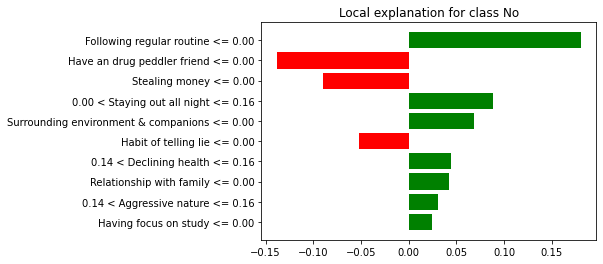

In [ ]:

exp = interpretor.explain_instance(
    data_row = X_test_rfe[7], ##new data
    predict_fn=model_R.predict_proba)

exp.save_to_file('limej.html')
fig = exp.as_pyplot_figure()
fig